# Progetto PAA, a.a. 2015/2016

Autori: Tommaso Papini (5537529), Gabriele Bani (5719258)

## Quicksort

## Mergesort
Il **Mergesort** è un algoritmo di ordinamento ricorsivo, basato su confronti, che utilizza la tecnica del **divide et impera** per ordinare, ad esempio, un vettore di n elementi.

Supponiamo di voler ordinare un vettore $a[1..n]$. Secondo l'implementazione del Mergesort vista a lezione, occorre:

<ul>
<li> suddividere, ricorsivamente, il vettore a in due parti fino ad arrivare all'insieme contenente un solo elemento</li>
<li> ordinare e fondere i sottovettori partendo dai sottoinsiemi che hanno il minor numero di elementi
</ul>

Il **numero di confronti** del Mergesort è dato dalla seguente relazione di ricorrenza:

$$
C_n = C_{\lfloor\frac{n}{2}\rfloor} + C_{\lceil\frac{n}{2}\rceil} + n\\
C_1 = 0
$$
<br></br>
<br></br>

**Verifichiamo adesso che, se $\mathbf{n = 2^m}$, allora $$C_n = n \lfloor log_2 n\rfloor - 2^{\lfloor log_2 n\rfloor +1} + 2n$$**

Sia $D_n = C_{n+1} - C_n$

Allora $$D_n = C_{\lfloor\frac{n+1}{2}\rfloor} + C_{\lceil\frac{n+1}{2}\rceil}+n+1-C_{\lfloor\frac{n}{2}\rfloor} - C_{\lceil\frac{n}{2}\rceil}-n$$

Tuttavia, sappiamo che:

$\lfloor\frac{n+1}{2}\rfloor = \lceil\frac{n}{2}\rceil\\
\lceil\frac{n+1}{2}\rceil = \lfloor\frac{n}{2}\rfloor+1$

Quindi $$D_n = C_{\lceil\frac{n+1}{2}\rceil}+1-C_{\lfloor\frac{n}{2}\rfloor} = C_{\lfloor\frac{n}{2}\rfloor+1}+1-C_{\lfloor\frac{n}{2}\rfloor}$$

Ma, per definizione di $D_n$, abbiamo che $$D_{\lfloor\frac{n}{2}\rfloor} = C_{\lfloor\frac{n}{2}\rfloor+1}-C_{\lfloor\frac{n}{2}\rfloor}$$

Quindi possiamo dire che $$D_n = D_{\lfloor\frac{n}{2}\rfloor} +1$$

La condizione iniziale è che $D_1=C_2-C_1=2-0=2$

Poiché $D_n = D_{\lfloor\frac{n}{2}\rfloor} +1$ allora $D_n = D_{\lfloor\frac{n}{2}\rfloor} +1 = D_{\lfloor\frac{n}{2^2}\rfloor} +1+1=\dots=D_{\lfloor\frac{n}{2^k}\rfloor} +k$  

<br></br>
<br></br>

**Per quali valori di n abbiamo che $\mathbf{\lfloor\frac{n}{2^k}\rfloor=1}$ ?**

$$
2^k \leq n < 2^k+1
$$

<div style="text-align: center;" markdown="1">ovvero</div>

$$
k \leq log_2 n < k+1
$$

Quindi $ k \leq log_2 n$ e, al contempo, $k > log_2 n -1$. Quindi $\mathbf{k = \lfloor log_2 n\rfloor}$
<br></br>
<br></br>
<br></br>

Quindi se $\mathbf{k = \lfloor log_2 n\rfloor}$ allora $D_n = D_1 + k = 2 + \lfloor log_2 n\rfloor$ ovvero $D_n = C_{n+1} - C_n = 2 + \lfloor log_2 n\rfloor$

$$
C_{n+1} = C_n + 2 + \lfloor log_2 n\rfloor = C_{n-1} +2+\lfloor log_2 (n-1)\rfloor +2+\lfloor log_2 n\rfloor = \dots = C_1 + 2n + \sum_{k=1}^{n}\lfloor log_2 k\rfloor = 2n + \sum_{k=1}^{n}\lfloor log_2 k\rfloor 
$$

<br></br>

Quindi $$C_{n} = 2(n-1) + \sum_{k=1}^{n-1}\lfloor log_2 k\rfloor $$


In [99]:
import sympy
import math
import numpy
from sympy import *
from sympy.abc import x, n, k, z, t
init_printing()


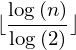

In [100]:
def f(n):
        if n==0:
            return 0
        else:
            return floor(log(n,2))
f(n)

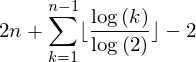

In [111]:
Cn = 2*(n-1) + Sum(f(k),(k,1,n-1)).doit()
Cn

La funzione $f(n) = \lfloor log_2 n\rfloor$ ritornerà, dunque, i seguenti valori per n $\geq$ 0

0,0,1,1,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4, $\dots$

dove

il numero di 1 è $2^1 = 2$
    
il numero di 2 è $2^2 = 4$

il numero di 3 è $2^3 = 8$

il numero di 4 è $2^4 = 16$

$\dots$

Infatti:

In [102]:
f(0),f(1),f(2),f(3),f(4),f(5),f(6),f(7),f(8),f(9),f(10),f(11),f(12),f(13),f(14),f(15),f(16),f(17),f(18),f(19),f(20)

Sappiamo che la funzione generatrice di 0,0,1,1,1,1,1,1,1,1,1$\dots$ è 


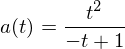

In [103]:
a = Function('a')(t)
two_zeros = Eq(a, t**2 /(1-t))
two_zeros

Sappiamo che la funzione generatrice di 0,0,0,0,1,1,1,1,1,1,1$\dots$ è 

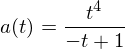

In [104]:
four_zeros = Eq(a, t**4 /(1-t))
four_zeros

Sappiamo che la funzione generatrice di 0,0,0,0,0,0,0,0,1,1,1$\dots$ è 

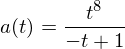

In [105]:
eight_zeros = Eq(a, t**8 /(1-t))
eight_zeros

Quindi la funzione generatrice della funzione $f(n) = \lfloor log_2 n\rfloor$ è

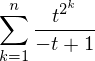

In [121]:
Gfn = Sum(t**2**k /(1-t),(k,1,n)).doit()
Gfn